# Working with Dates and Times in R

> "the essentials of parsing, manipulating, and computing with dates and times in R. By ([VICTOR OMONDI](https://linkedin.com/in/VictorOmondi1997))"

- author: Victor Omondi
- toc: true
- comments: true
- categories: [dates, times, r]
- image: images/wdtr-shield.png

# Overview

Dates and times are abundant in data and essential for answering questions that start with when, how long, or how often. However, they can be tricky, as they come in a variety of formats and can behave in unintuitive ways. This article teaches you the essentials of parsing, manipulating, and computing with dates and times in R. By the end, we'll have mastered the lubridate package, a member of the tidyverse, specifically designed to handle dates and times. we'll also have applied the new skills to explore how often R versions are released, when the weather is good in Auckland (the birthplace of R), and how long monarchs ruled in Britain.

# Libraries

In [174]:
library(readr)
library(anytime)
library(ggplot2)
library(dplyr)
library(lubridate)
library(ggridges)
library(fasttime)
library(tidyverse)
library(microbenchmark)

Warning message:
"package 'microbenchmark' was built under R version 3.6.3"

In [173]:
install.packages("microbenchmark")

package 'microbenchmark' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\user\AppData\Local\Temp\RtmpUtbNCC\downloaded_packages


# Dates and Times in R

R doesn't know something is a date or time unless you tell it. We'll explore some of the ways R stores dates and times by exploring how often R versions are released, and how quickly people download them.

## Introduction to dates


> ### Dates
- Different conventions in different places
- 27th Feb 2013
  - **NZ**: 27/2/2013
  - **USA**: 2/27/2013

> ### The global standard numeric date format
![image.png](datasets/iso_announcement.png){% fn 1%}

> ### ISO 8601 YYYY-MM-DD
- Values ordered from the largest to smallest unit of time
- Each has a xed number of digits, must be padded with leadingzeros
- Either, no separators for computers, or - in dates
  - 1st of January 2011 -> 2011-01-01

> Dates in R
- Packages that importd ates:`readr`,`anytime`


In [2]:
2003-02-27

[1] 1974

In [3]:
as.Date("2003-02-27")

[1] "2003-02-27"

In [4]:
"2003-02-27"

[1] "2003-02-27"

In [5]:
str("2003-02-27")

 chr "2003-02-27"


In [6]:
str(as.Date("2003-02-27"))

 Date[1:1], format: "2003-02-27"


### Specifying dates

R doesn't know something is a date unless you tell it. If you have a character string that represents a date in the ISO 8601 standard you can turn it into a [Date](https://www.rdocumentation.org/packages/base/versions/3.4.1/topics/Dates) using the [`as.Date()`](https://www.rdocumentation.org/packages/base/topics/as.Date) function. Just pass the character string (or a vector of character strings) as the first argument.

We'll convert a character string representation of a date to a `Date` object.

In [7]:
# The date R 3.0.0 was released
x <- "2013-04-03"

# Examine structure of x
str(x)

# Use as.Date() to interpret x as a date
x_date <- as.Date(x)

# Examine structure of x_date
str(x_date)

# Store April 10 2014 as a Date
april_10_2014 <- as.Date("2014-04-10")
april_10_2014

 chr "2013-04-03"
 Date[1:1], format: "2013-04-03"


[1] "2014-04-10"

### Automatic import

Sometimes we'll need to input a couple of dates by hand using as.Date() but it's much more common to have a column of dates in a data file.

Some functions that read in data will automatically recognize and parse dates in a variety of formats. In particular the import functions, like [`read_csv()`](https://www.rdocumentation.org/packages/readr/topics/read_csv), in the `readr` package will recognize dates in a few common formats.

There is also the [`anytime()`](https://www.rdocumentation.org/packages/anytime/topics/anytime) function in the `anytime` package whose sole goal is to automatically parse strings as dates regardless of the format.

In [8]:
# Use read_csv() to import rversions.csv
releases <- read_csv('datasets/rversions.csv')

# Examine the structure of the date column
str(releases$date)

# Various ways of writing Sep 10 2009
sep_10_2009 <- c("September 10 2009", "2009-09-10", "10 Sep 2009", "09-10-2009")

# Use anytime() to parse sep_10_2009
anytime(sep_10_2009)

Parsed with column specification:
cols(
  major = col_double(),
  minor = col_double(),
  patch = col_double(),
  date = col_date(format = ""),
  datetime = col_datetime(format = ""),
  time = col_time(format = ""),
  type = col_character()
)


 Date[1:105], format: "1997-12-04" "1997-12-21" "1998-01-10" "1998-03-14" "1998-05-02" ...


[1] "2009-09-10 EAT" "2009-09-10 EAT" "2009-09-10 EAT" "2009-09-10 EAT"

## Why use dates?

> ### Dates act like numbers
- Date objects are stored as days since 1970-01-01

In [9]:
as.Date("2020-07-13") > as.Date("2020-01-01")

[1] TRUE

In [10]:
as.Date("2020-07-10") + 3

[1] "2020-07-13"

In [11]:
as.Date("2020-07-13") - as.Date("2019-07-13")

Time difference of 366 days

> ### Plotting with dates

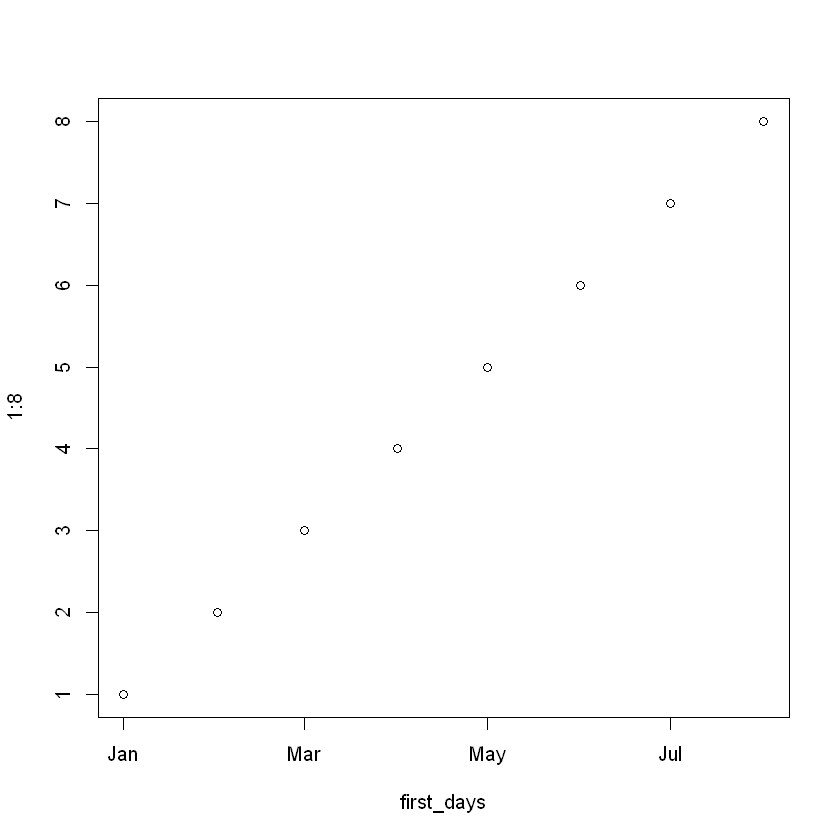

In [12]:
first_days = c(as.Date("2020-01-01"), as.Date("2020-02-01"), 
               as.Date("2020-03-01"), as.Date("2020-04-01"), 
               as.Date("2020-05-01"), as.Date("2020-06-01"), 
               as.Date("2020-07-01"), as.Date("2020-08-01"))
plot(first_days, 1:8)

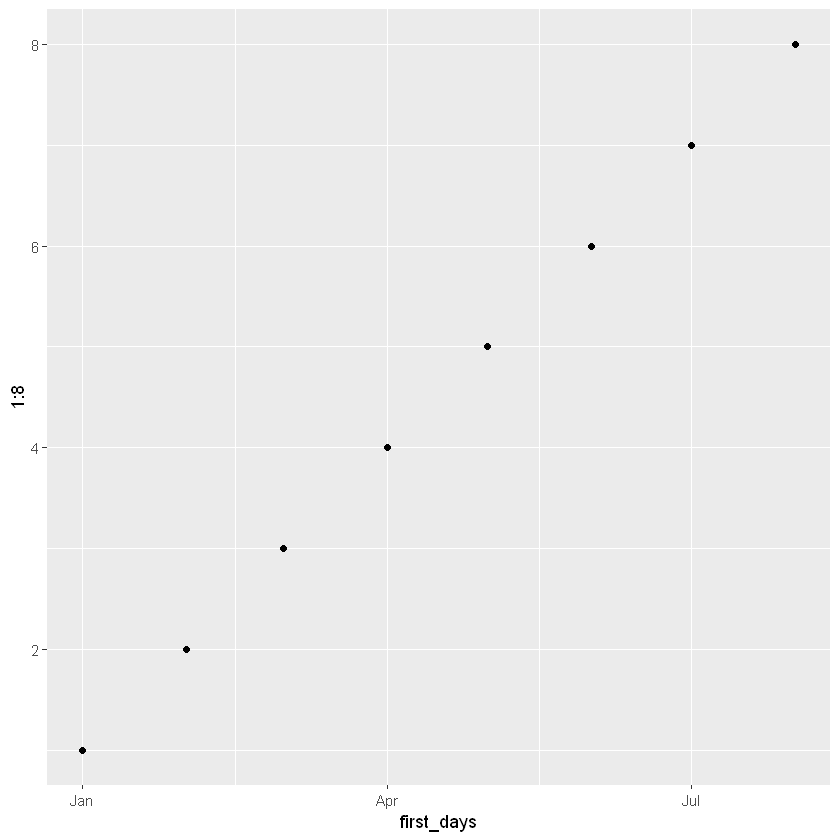

In [13]:
ggplot() + geom_point(aes(x=first_days, y=1:8))

> ### R releases

In [14]:
head(releases)

major,minor,patch,date,datetime,time,type
0,60,NA,1997-12-04,1997-12-04 08:47:58,08:47:58,patch
0,61,NA,1997-12-21,1997-12-21 13:09:22,13:09:22,minor
0,61,1,1998-01-10,1998-01-10 00:31:55,00:31:55,patch
0,61,2,1998-03-14,1998-03-14 19:25:55,19:25:55,patch
0,61,3,1998-05-02,1998-05-02 07:58:17,07:58:17,patch
0,62,NA,1998-06-14,1998-06-14 12:56:20,12:56:20,minor


### Plotting

If you plot a `Date` on the axis of a plot, you expect the dates to be in calendar order, and that's exactly what happens with [`plot()`](https://www.rdocumentation.org/packages/graphics/topics/plot) or [`ggplot()`](https://www.rdocumentation.org/packages/ggplot2/topics/ggplot).

We'll make some plots with the R version `releases` data using ggplot2. There are two big differences when a `Date` is on an axis:

1. If you specify limits they must be Date objects.
2. To control the behavior of the scale we'll use the `scale_x_date()` function.

Warning message:
"Removed 87 row(s) containing missing values (geom_path)."

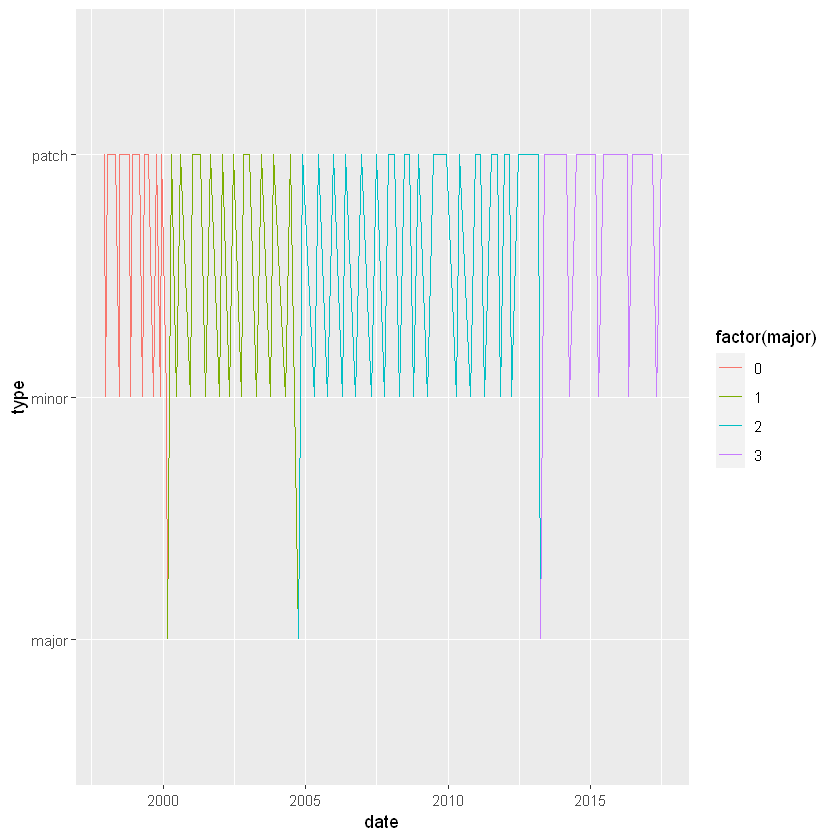

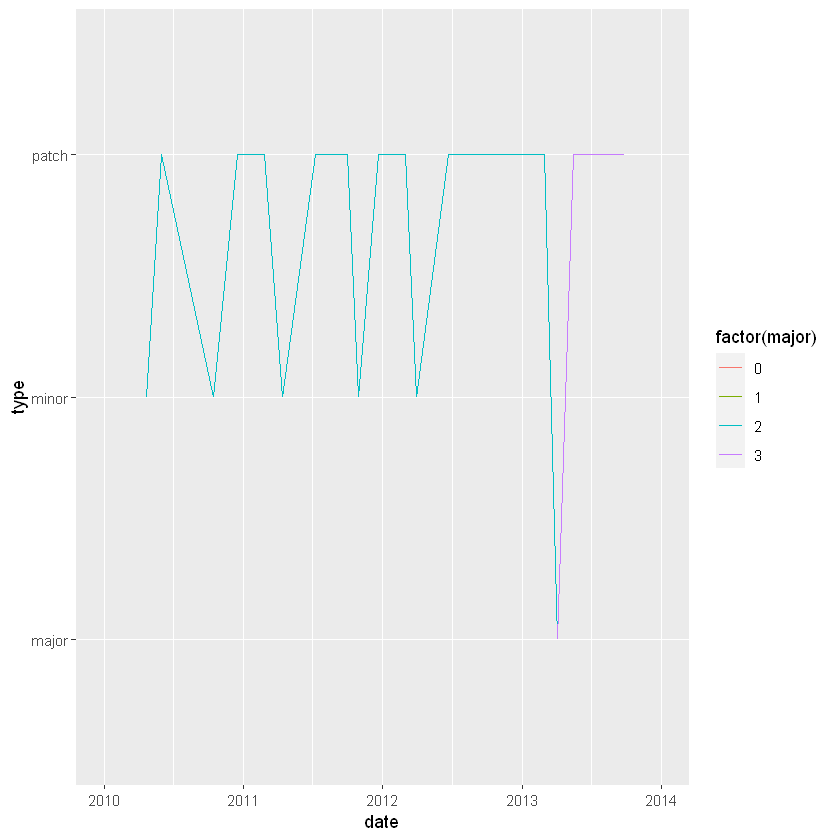

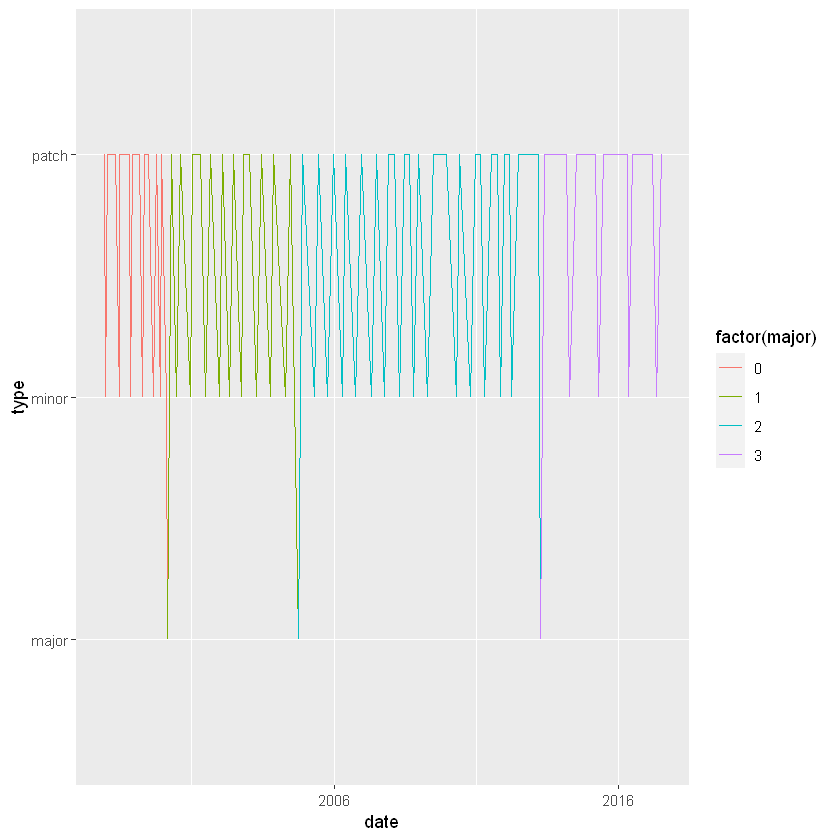

In [15]:
# Set the x axis to the date column
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major)))

# Limit the axis to between 2010-01-01 and 2014-01-01
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  xlim(as.Date("2010-01-01"), as.Date("2014-01-01"))

# Specify breaks every ten years and labels with "%Y"
ggplot(releases, aes(x = date, y = type)) +
  geom_line(aes(group = 1, color = factor(major))) +
  scale_x_date(date_breaks = "10 years", date_labels = "%Y")

### Arithmetic and logical operators

Since `Date` objects are internally represented as the number of days since 1970-01-01 we can do basic math and comparisons with dates. We can compare dates with the usual [logical operators](https://www.rdocumentation.org/packages/base/topics/Comparison) (`<`, `==`, `>` etc.), find extremes with [`min()`](https://www.rdocumentation.org/packages/base/topics/min) and [`max()`](https://www.rdocumentation.org/packages/base/topics/max), and even subtract two dates to find out the time between them.

In [16]:
# Find the largest date
last_release_date <- max(releases$date)

# Filter row for last release
last_release <- filter(releases, date==last_release_date)

# Print last_release
last_release

# How long since last release?
Sys.Date() - last_release_date

major,minor,patch,date,datetime,time,type
3,4,1,2017-06-30,2017-06-30 07:04:11,07:04:11,patch


Time difference of 1110 days

 <a href="https://www.rdocumentation.org/packages/base/topics/Sys.date()">`Sys.date()`</a>- in the code, it simply returns today's date.

## What about times?

> ### ISO 8601
- HH:MM:SS
  - Largest unit to smallest
  - Fixed digits
    - Hours: 00 -- 24
    - Minutes: 00 -- 59
    - Seconds: 00 -- 60 (60 only for leap seconds)
  - No separator or :


> ### Datetimes in R
- Two objects types:
  - `POSIXlt` - list with named components
  - `POSIXct` - seconds since 1970-01-01 00:00:00
- `POSIXct` will go in a data frame
- `as.POSIXct()` turns a string into a `POSIXct` object

In [17]:
str(as.POSIXct("1997-06-15 00:01:00"))

 POSIXct[1:1], format: "1997-06-15 00:01:00"


> ### Timezones
- `"2013-02-27T18:00:00"`-6pm localtime
- `"2013-02-27T18:00:00Z"`-6pm UTC
- `"2013-02-27T18:00:00-08:00"`-6pmin Oregon

In [18]:
as.POSIXct("1997-06-15T18:00:59Z")

[1] "1997-06-15 EAT"

In [19]:
as.POSIXct("1997-06-15T18:00:59Z", tz="UTC")

[1] "1997-06-15 UTC"

> ### Datetimes behave nicely too
- Once a `POSIXct` object,datetimes can be:
  - Compared
  - Subtracted
  - Plotted


### Getting datetimes into R


Just like dates without times, if you want R to recognize a string as a datetime you need to convert it, although now you use <a href="https://www.rdocumentation.org/packages/base/topics/as.POSIXct()">`as.POSIXct()`</a>. `as.POSIXct()` expects strings to be in the format YYYY-MM-DD HH:MM:SS.

The only tricky thing is that times will be interpreted in local time based on your machine's set up. You can check your timezone with [`Sys.timezone()`](https://www.rdocumentation.org/packages/base/topics/Sys.timezone). If you want the time to be interpreted in a different timezone, you just set the `tz` argument of `as.POSIXct()`.

In [20]:
Sys.timezone()

[1] "Africa/Nairobi"

In [21]:
# Use as.POSIXct to enter the datetime 
as.POSIXct("2010-10-01 12:12:00")

# Use as.POSIXct again but set the timezone to `"America/Los_Angeles"`
as.POSIXct("2010-10-01 12:12:00", tz = "America/Los_Angeles")

# Examine structure of datetime column
str(releases$datetime)

[1] "2010-10-01 12:12:00 EAT"

[1] "2010-10-01 12:12:00 PDT"

 POSIXct[1:105], format: "1997-12-04 08:47:58" "1997-12-21 13:09:22" "1998-01-10 00:31:55" ...


### Datetimes behave nicely too

Just like `Date` objects, you can plot and do math with `POSIXct` objects. We'll see how quickly people download new versions of R, by examining the download logs from the RStudio CRAN mirror. R 3.2.0 was released at "2015-04-16 07:13:33" so `cran-logs_2015-04-17.csv` contains a random sample of downloads on the 16th, 17th and 18th.

In [22]:
# Import "cran-logs_2015-04-17.csv" with read_csv()
logs <- read_csv("datasets/cran-logs_2015-04-17.csv")

# Print logs
head(logs)

Parsed with column specification:
cols(
  datetime = col_datetime(format = ""),
  r_version = col_character(),
  country = col_character()
)


datetime,r_version,country
2015-04-16 22:40:19,3.1.3,CO
2015-04-16 09:11:04,3.1.3,GB
2015-04-16 17:12:37,3.1.3,DE
2015-04-18 12:34:43,3.2.0,GB
2015-04-16 04:49:18,3.1.3,PE
2015-04-16 06:40:44,3.1.3,TW


datetime,r_version,country


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


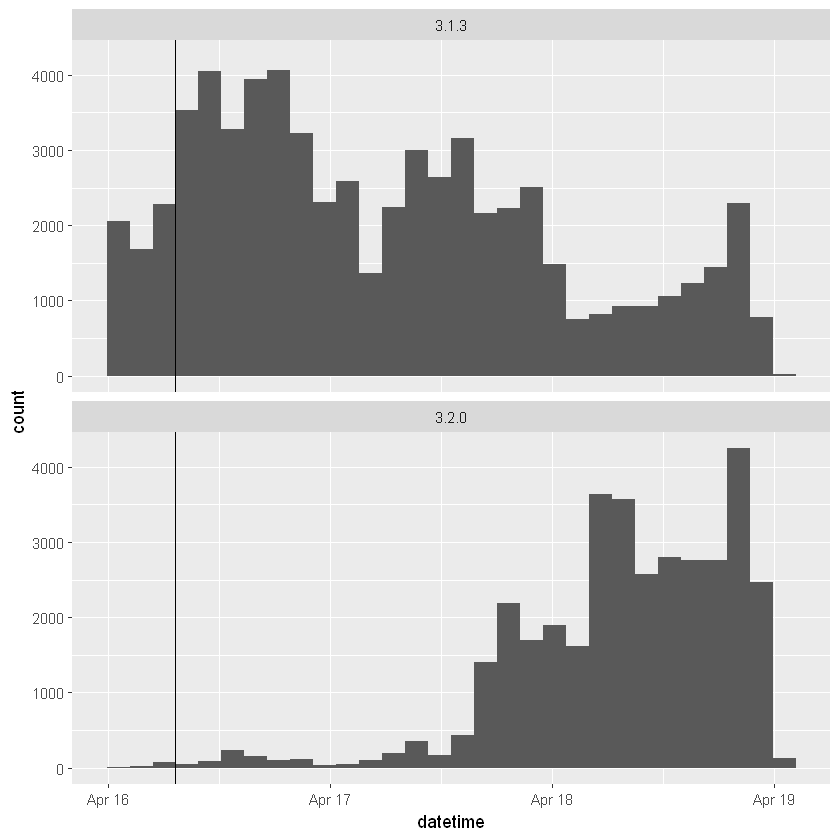

In [23]:
# Store the release time as a POSIXct object
release_time <- as.POSIXct("2015-04-16 07:13:33", tz = "UTC")

# When is the first download of 3.2.0?
logs %>% 
  filter(datetime==release_time,
    r_version == "3.2.0")

# Examine histograms of downloads by version
ggplot(logs, aes(x = datetime)) +
  geom_histogram() +
  geom_vline(aes(xintercept = as.numeric(release_time)))+
  facet_wrap(~ r_version, ncol = 1)

it takes about two days for downloads of the new version (3.2.0) to overtake downloads of the old version (3.1.3)

## Why lubridate?


> ### lubridate
- Make working with dates and times in R easy!
- `tidyverse` package
  - Plays nicely with builtin datetime objects
  - Designed for humans not computers
- Plays nicely with other `tidyverse` packages
- Consistent behaviour regardless of underlying object


> ### Parsing a wide range of formats

In [24]:
ymd("1997-06-15")

[1] "1997-06-15"

In [25]:
dmy("15/06/97")

[1] "1997-06-15"

In [26]:
parse_date_time(c("June 15th, 1997", "15th June, 1997"), order=c("mdy", "dmy"))

[1] "1997-06-15 UTC" "1997-06-15 UTC"

> ### Manipulating datetimes

In [27]:
akl_daily = read_csv("datasets/akl_weather_daily.csv")
head(akl_daily)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_double(),
  min_temp = col_double(),
  mean_temp = col_double(),
  mean_rh = col_double(),
  events = col_character(),
  cloud_cover = col_double()
)


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1


In [28]:
akl_daily_m <- akl_daily %>%
    mutate(
        year = year(date),
        yday = yday(date),
        month = month(date, label=TRUE)
    )
head(akl_daily_m)

date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover,year,yday,month
2007-9-1,60,51,56,75,NA,4,2007,244,Sep
2007-9-2,60,53,56,82,Rain,4,2007,245,Sep
2007-9-3,57,51,54,78,NA,6,2007,246,Sep
2007-9-4,64,50,57,80,Rain,6,2007,247,Sep
2007-9-5,53,48,50,90,Rain,7,2007,248,Sep
2007-9-6,57,42,50,69,NA,1,2007,249,Sep


> ### Other lubridate features
- Handling timezones
- Fast parsing of standard formats
- Outputting datetimes


# Parsing and Manipulating Dates and Times with lubridate

Dates and times come in a huge assortment of formats, so the first hurdle is often to parse the format you have into an R datetime. We will explore how to import dates and times with the lubridate package. We'll also explore how to extract parts of a datetime. We'll practice by exploring the weather in R's birthplace, Auckland NZ.

## Parsing dates with lubridate

> ### ymd()
- 27th of February 2013
- `ymd()` - year, then month, then day

In [29]:
ymd("1997-06-15")

[1] "1997-06-15"

In [30]:
ymd("97/6/15")

[1] "1997-06-15"

In [31]:
ymd("97t6t15")

[1] "1997-06-15"

> ### Friends of ymd()
- `ymd()`,`ydm()`,`mdy()`,`myd()`,`dmy()`,`dym()`, `dmy_hm()`
- `parse_date_time(x = ___, order = ___)`

> ### Formatting characters
|Character|Meaning||Character|Meaning|
|---|---|---|---|---|
|`d`|numeric day of the month||`a`|Abbreviated weekday|
|`m`|month of the year||`A`|Full weekday|
|`y`|Year with century||`b`|Abbreviated month name|
|`Y`|year without century||`B`|full month name|
|`H`|hours (24 hours)||`I`|hours (12 hour)|
|`M`|minutes||`P`|AM/PM|
|`z`|Timezone, offset||||

### Selecting the right parsing function

`lubridate` provides a set of functions for parsing dates of a known order. For example, [`ymd()`](https://www.rdocumentation.org/packages/lubridate/topics/ymd) will parse dates with year first, followed by month and then day. The parsing is flexible, for example, it will parse the `m` whether it is numeric (e.g. `9` or `09`), a full month name (e.g. `September`), or an abbreviated month name (e.g. `Sep`).

All the functions with `y`, `m` and `d` in any order exist. If the dates have times as well, you can use the functions that start with `ymd`, `dmy`, `mdy` or `ydm` and are followed by any of `_h`, `_hm` or [`_hms`](https://www.rdocumentation.org/packages/lubridate/topics/ymd_hms).

In [32]:
# Parse x 
x <- "2010 September 20th" # 2010-09-20
ymd(x)

# Parse y 
y <- "02.01.2010"  # 2010-01-02
dmy(y)

# Parse z 
z <- "Sep, 12th 2010 14:00"  # 2010-09-12T14:00
mdy_hm(z)

[1] "2010-09-20"

[1] "2010-01-02"

[1] "2010-09-12 14:00:00 UTC"

### Specifying an order with `parse_date_time()`

What about if you have something in a really weird order like `dym_msh`?There's no named function just for that order, but that is where [`parse_date_time()`](https://www.rdocumentation.org/packages/lubridate/topics/parse_date_time) comes in. `parse_date_time()` takes an additional argument, `orders`, where you can specify the order of the components in the date. 

For example, to parse `"2010 September 20th"` you could say `parse_date_time("2010 September 20th", orders = "ymd")` and that would be equivalent to using the `ymd()` function from the previous exercise.

One advantage of `parse_date_time()` is that you can use more format characters. For example, you can specify weekday names with `A`, `I` for 12 hour time, am/pm indicators with `p` and many others. Another big advantage is that you can specify a vector of orders, and that allows parsing of dates where multiple formats might be used.

In [33]:
# Specify an order string to parse x
x <- "Monday June 1st 2010 at 4pm"
parse_date_time(x, orders = "ABdyIp")

# Specify order to include both "mdy" and "dmy"
two_orders <- c("October 7, 2001", "October 13, 2002", "April 13, 2003", 
  "17 April 2005", "23 April 2017")
parse_date_time(two_orders, orders = c("Bdy", "Bdy", "Bdy", "dBy", "dBy"))

# Specify order to include "dOmY", "OmY" and "Y"
short_dates <- c("11 December 1282", "May 1372", "1253")
parse_date_time(short_dates, orders = c("d0mY", "0mY", "Y"))


[1] "2010-06-01 16:00:00 UTC"

[1] "2001-10-07 UTC" "2002-10-13 UTC" "2003-04-13 UTC" "2005-04-17 UTC"
[5] "2017-04-23 UTC"

[1] "1282-12-11 UTC" "1372-05-01 UTC" "1253-01-01 UTC"

> Note:  when a date component is missing, it's just set to `1`? For example, the input `1253` resulted in the date `1253-01-01`.

## Weather in Auckland

> ### make_date(year, month, day)

In [34]:
make_date(year=1997, month=6, day=15)

[1] "1997-06-15"

`make_datetime(year, month, day, hour, min, sec)` for datetimes

> ### dplyr Review
- `mutate()` - add new columns (or overwrite old ones)
- `filter()` - subset rows
- `select()` - subset columns
- `arrange()` - order rows
- `summarise()` - summarise rows
- `group_by()` - useful in conjuction with `summarise()`


### Import daily weather data

In practice you won't be parsing isolated dates and times, they'll be part of a larger dataset. We'll be working with weather data from Auckland NZ.

There are two data sets: 
- `akl_weather_daily.csv` a set of once daily summaries for 10 years, and 
- `akl_weather_hourly_2016.csv` observations every half hour for 2016.

In [35]:
# Import CSV with read_csv()
akl_daily_raw <- read_csv("datasets/akl_weather_daily.csv")

# Print akl_daily_raw
head(akl_daily_raw)

Parsed with column specification:
cols(
  date = col_character(),
  max_temp = col_double(),
  min_temp = col_double(),
  mean_temp = col_double(),
  mean_rh = col_double(),
  events = col_character(),
  cloud_cover = col_double()
)


date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-9-1,60,51,56,75,NA,4
2007-9-2,60,53,56,82,Rain,4
2007-9-3,57,51,54,78,NA,6
2007-9-4,64,50,57,80,Rain,6
2007-9-5,53,48,50,90,Rain,7
2007-9-6,57,42,50,69,NA,1


In [36]:
# Parse date 
akl_daily <- akl_daily_raw %>%
  mutate(date = ymd(date))

# Print akl_daily
head(akl_daily)

date,max_temp,min_temp,mean_temp,mean_rh,events,cloud_cover
2007-09-01,60,51,56,75,NA,4
2007-09-02,60,53,56,82,Rain,4
2007-09-03,57,51,54,78,NA,6
2007-09-04,64,50,57,80,Rain,6
2007-09-05,53,48,50,90,Rain,7
2007-09-06,57,42,50,69,NA,1


Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

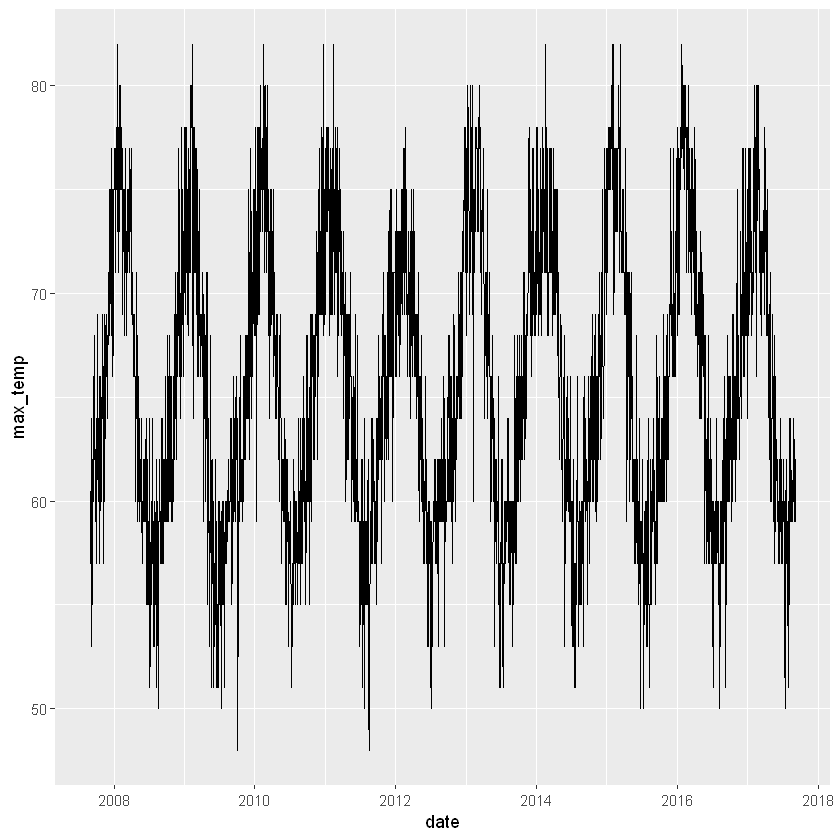

In [37]:
# Plot to check work
akl_daily %>%
    ggplot(aes(x = date, y = max_temp)) +
        geom_line() 

The temperatures are in farenheit. Yup, summer falls in Dec-Jan-Feb.

### Import hourly weather data

The hourly data is a little different. The date information is spread over three columns `year`, `month` and `mday`, so we'll need to use `make_date()` to combine them.

In [38]:
akl_hourly_raw <- read_csv("datasets/akl_weather_hourly_2016.csv")
head(akl_hourly_raw)

Parsed with column specification:
cols(
  year = col_double(),
  month = col_double(),
  mday = col_double(),
  time = col_time(format = ""),
  temperature = col_double(),
  weather = col_character(),
  conditions = col_character(),
  events = col_character(),
  humidity = col_double(),
  date_utc = col_datetime(format = "")
)


year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc
2016,1,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00
2016,1,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00
2016,1,1,01:00:00,68,Clear,Clear,NA,73,2015-12-31 12:00:00
2016,1,1,01:30:00,68,Clear,Clear,NA,68,2015-12-31 12:30:00
2016,1,1,02:00:00,68,Clear,Clear,NA,68,2015-12-31 13:00:00
2016,1,1,02:30:00,68,Clear,Clear,NA,68,2015-12-31 13:30:00


Then the time information is in a separate column again, `time`. It's quite common to find `date` and `time` split across different variables. One way to construct the datetimes is to paste the date and time together and then parse them.


In [39]:
# Use make_date() to combine year, month and mday 
akl_hourly  <- akl_hourly_raw  %>% 
  mutate(date = make_date(year = year, month = month, day = mday))

# Parse datetime_string 
akl_hourly <- akl_hourly  %>% 
  mutate(
    datetime_string = paste(date, time, sep = "T"),
    datetime = ymd_hms(datetime_string)
  )

# Print date, time and datetime columns of akl_hourly
akl_hourly %>% 
    select(date, time, datetime) %>%
        head()

date,time,datetime
2016-01-01,00:00:00,2016-01-01 00:00:00
2016-01-01,00:30:00,2016-01-01 00:30:00
2016-01-01,01:00:00,2016-01-01 01:00:00
2016-01-01,01:30:00,2016-01-01 01:30:00
2016-01-01,02:00:00,2016-01-01 02:00:00
2016-01-01,02:30:00,2016-01-01 02:30:00


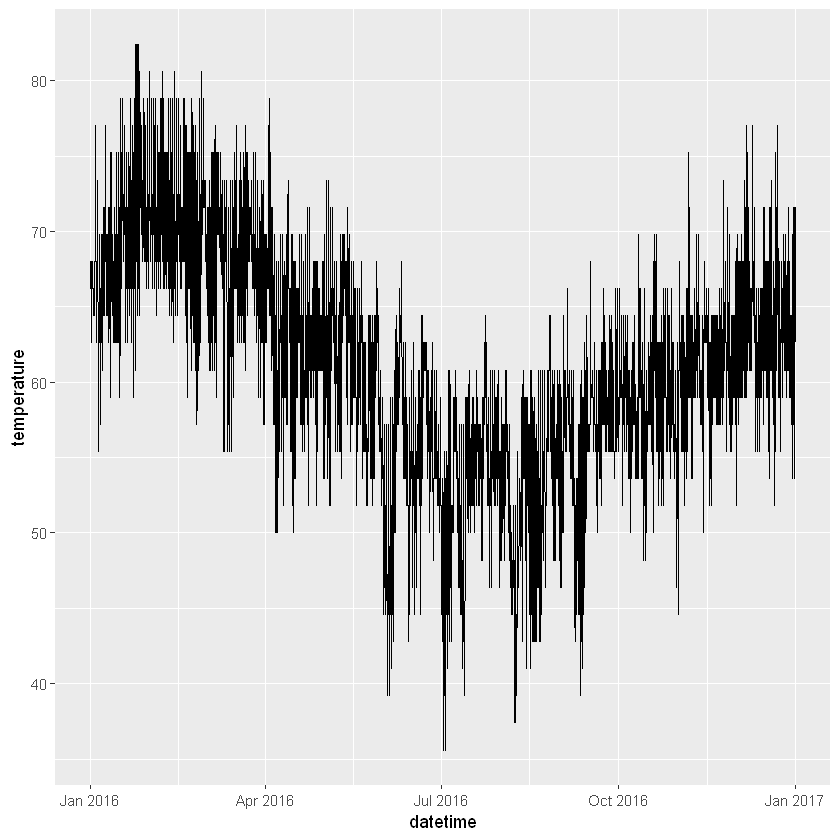

In [40]:
# Plot to check work
akl_hourly %>%
    ggplot(aes(x = datetime, y = temperature)) +
        geom_line()


It's interesting how the day to day variation is about half the size of the yearly variation.

## Extracting parts of a datetime

> ### Extracting parts of a datetime

In [41]:
yob = ymd("1997-06-15")
yob

[1] "1997-06-15"

In [42]:
year(yob)

[1] 1997

In [43]:
month(yob)

[1] 6

In [44]:
day(yob)

[1] 15

> ### Extracting parts of a datetime
|Function|Extracts|
|---|---|
|`year()`|Year with century|
|`month()`|Month (1-12)|
|`day()`|Day of month (1-31)|
|`hour()`|Hour (0-23)|
|`min()`|Minute (0-59)|
|`second()`|Second (0-59)|
|`wday()`|Weekday (1-7)|


> ### Setting parts of a datetime


In [45]:
yob

[1] "1997-06-15"

In [46]:
year(yob) <- 2020

In [47]:
yob

[1] "2020-06-15"

> ### Other useful functions
|Function|Extracts|
|---|---|
|`leap_year()`|In leap year (TRUE or FALSE)|
|`am()`|In morning (TRUE or FALSE)|
|`pm()`|In afternoon (TRUE or FALSE)|
|`dst()`|During daylight savings (TRUE or FALSE)|
|`quarter()`|Quarter of year (1-4)|
|`semester()`|Half of year (1-2)|

In [48]:
# Examine the head() of release_time
head(releases$datetime)



[1] "1997-12-04 08:47:58 UTC" "1997-12-21 13:09:22 UTC"
[3] "1998-01-10 00:31:55 UTC" "1998-03-14 19:25:55 UTC"
[5] "1998-05-02 07:58:17 UTC" "1998-06-14 12:56:20 UTC"

In [49]:
# Examine the head() of the months of release_time
head(month(releases$datetime))



[1] 12 12  1  3  5  6

In [50]:
# Extract the month of releases 
month(releases$datetime) %>% table()



.
 1  2  3  4  5  6  7  8  9 10 11 12 
 5  6  8 18  5 16  4  7  2 15  6 13 

In [51]:
# Extract the year of releases
year(releases$datetime) %>% table()



.
1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
   2   10    9    6    6    5    5    4    4    4    4    6    5    4    6    4 
2013 2014 2015 2016 2017 
   4    4    5    5    3 

In [52]:
# How often is the hour before 12 (noon)?
mean(hour(releases$datetime) < 12)



[1] 0.752381

In [53]:
# How often is the release in am?
mean(am(releases$datetime))

[1] 0.752381

R versions have historically been released most in April, June, October and December, 1998 saw 10 releases and about 75% of releases happen in the morning (at least according to UTC).

### Adding useful labels

Sometimes it's nicer (especially for plotting or tables) to have named months. Both the `month()` and `wday()` (day of the week) functions have additional arguments `label` and `abbr` to achieve just that. Set `label = TRUE` to have the output labelled with month (or weekday) names, and `abbr = FALSE` for those names to be written in full rather than abbreviated.

In [54]:
# Use wday() to tabulate release by day of the week
wday(releases$datetime) %>% table()



.
 1  2  3  4  5  6  7 
 3 29  9 12 18 31  3 

In [55]:
# Add label = TRUE to make table more readable
wday(releases$datetime, label=TRUE) %>% table()



.
Sun Mon Tue Wed Thu Fri Sat 
  3  29   9  12  18  31   3 

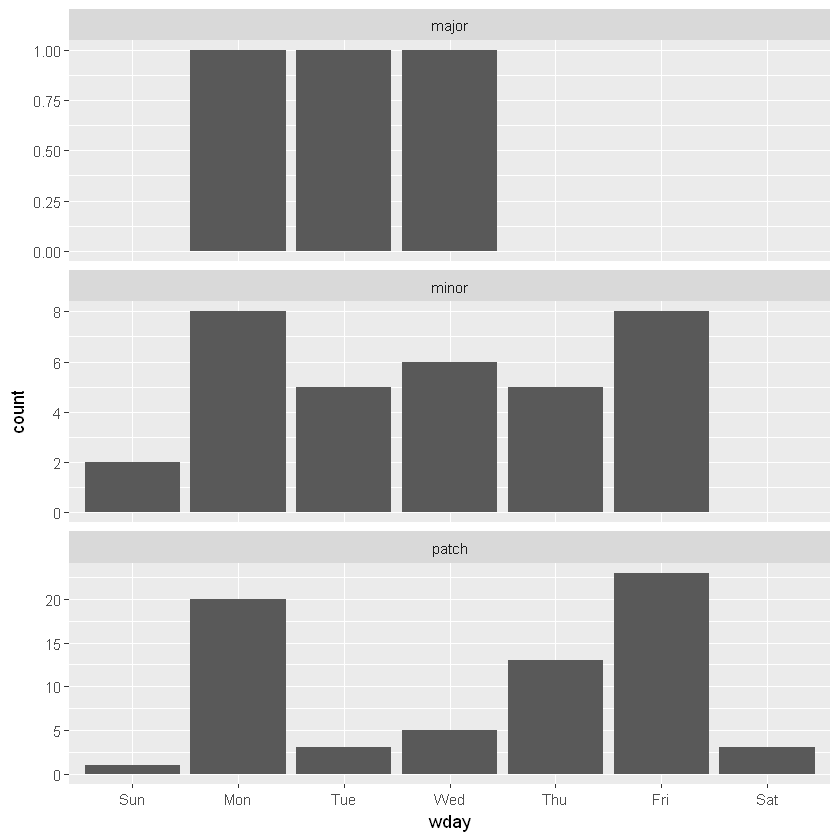

In [56]:
# Create column wday to hold labelled week days
releases$wday <- wday(releases$datetime, label=T)

# Plot barchart of weekday by type of release
releases %>%
    ggplot(aes(wday)) +
        geom_bar() +
        facet_wrap(~ type, ncol = 1, scale = "free_y")

Looks like not too many releases occur on the weekends, and there is quite a different weekday pattern between minor and patch releases.

### Extracting for plotting

Extracting components from a datetime is particularly useful when exploring data. Earlier we imported daily data for weather in Auckland, and created a time series plot of ten years of daily maximum temperature. While that plot gives a good overview of the whole ten years, it's hard to see the annual pattern.

We'll use components of the dates to help explore the pattern of maximum temperature over the year. The first step is to create some new columns to hold the extracted pieces, then we'll use them in a couple of plots.

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

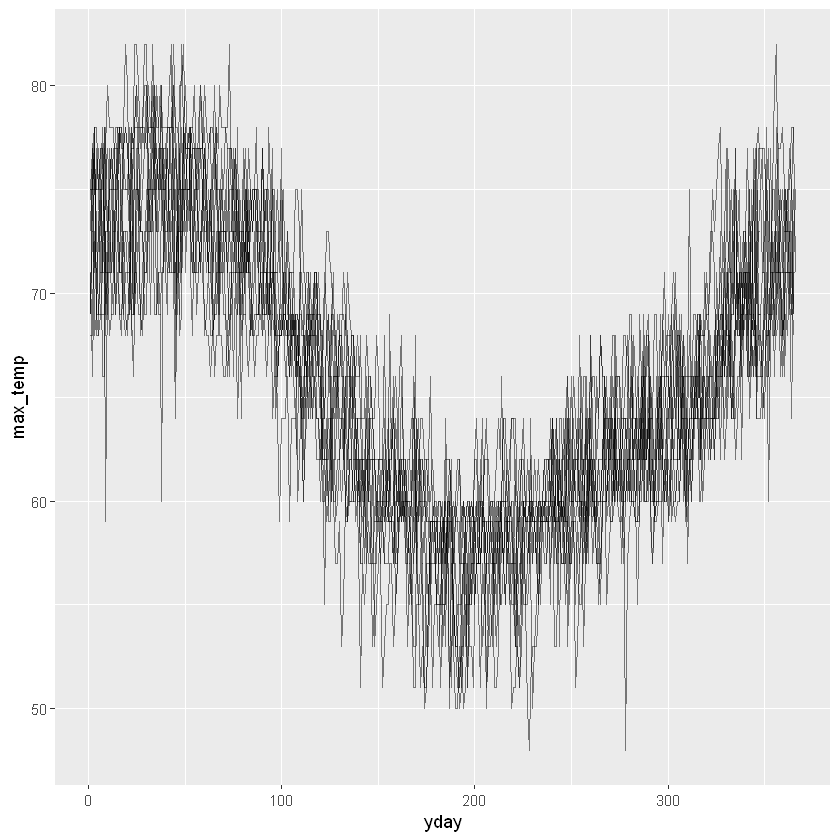

In [57]:
# Add columns for year, yday and month
akl_daily <- akl_daily %>%
  mutate(
    year = year(date),
    yday = yday(date),
    month = month(date, label=T))

# Plot max_temp by yday for all years
akl_daily %>%
    ggplot(aes(x = yday, y = max_temp)) +
    geom_line(aes(group = year), alpha = 0.5)



Warning message:
"Removed 10 rows containing non-finite values (stat_density)."

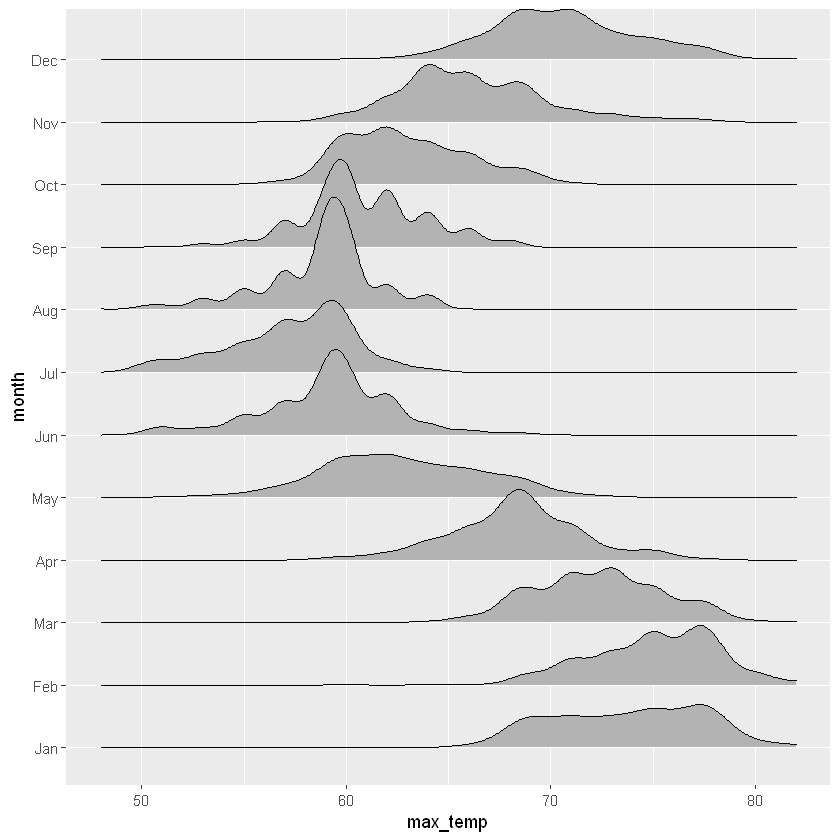

In [58]:
# Examine distribution of max_temp by month
akl_daily %>%
    ggplot(aes(x = max_temp, y = month, height = ..density..)) +
    geom_density_ridges(stat = "density")

Both plots give a great view into both the expected temperatures and how much they vary. Looks like Jan, Feb and Mar are great months to visit if you want warm temperatures. Did you notice the warning messages? These are a consequence of some missing values in the `max_tem`p column. They are a reminder to think carefully about what you might miss by ignoring missing values.

### Extracting for filtering and summarizing


Another reason to extract components is to help with filtering observations or creating summaries. For example, if you are only interested in observations made on weekdays (i.e. not on weekends) you could extract the weekdays then filter out weekends, e.g. `wday(date) %in% 2:6`.

We saw that January, February and March were great times to visit Auckland for warm temperatures, but will you need a raincoat?

We'll use the hourly data to calculate how many days in each month there was any rain during the day.

In [59]:
# Create new columns hour, month and rainy
akl_hourly <- akl_hourly %>%
  mutate(
    hour = hour(datetime),
    month = month(datetime, label=T),
    rainy = weather == "Precipitation"
  )

# Filter for hours between 8am and 10pm (inclusive)
akl_day <- akl_hourly %>% 
  filter(hour>=8, hour<=22)

# Summarise for each date if there is any rain
rainy_days <- akl_day %>% 
  group_by(month, date) %>%
  summarise(
    any_rain = any(rainy)
  )

# Summarise for each month, the number of days with rain
rainy_days<- rainy_days %>% 
    summarise(
        days_rainy = sum(any_rain)
    )
rainy_days

`summarise()` regrouping output by 'month' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


month,days_rainy
Jan,15
Feb,13
Mar,12
Apr,15
May,21
Jun,19
Jul,22
Aug,16
Sep,25
Oct,20


At least in 2016, it looks like you'll still need to pack a raincoat if you visit in Jan, Feb or March. Months of course are different lengths so we should really correct for that, take a look at [`days_in_month()`](https://www.rdocumentation.org/packages/lubridate/topics/days_in_month) for helping with that.

## Rounding datetimes

> ### Rounding versus extracting

In [60]:
release_time = releases$datetime
head(release_time)

[1] "1997-12-04 08:47:58 UTC" "1997-12-21 13:09:22 UTC"
[3] "1998-01-10 00:31:55 UTC" "1998-03-14 19:25:55 UTC"
[5] "1998-05-02 07:58:17 UTC" "1998-06-14 12:56:20 UTC"

In [61]:
release_time %>%
    head() %>%
        hour()

[1]  8 13  0 19  7 12

In [62]:
release_time %>%
    head() %>%
        floor_date(unit="hour")

[1] "1997-12-04 08:00:00 UTC" "1997-12-21 13:00:00 UTC"
[3] "1998-01-10 00:00:00 UTC" "1998-03-14 19:00:00 UTC"
[5] "1998-05-02 07:00:00 UTC" "1998-06-14 12:00:00 UTC"

> ### Rounding in lubridate
- `round_date()` - round to nearest
- `ceiling_date()` - round up
- `floor_date()` - round to down
- Possible values of unit:
  - `"second"`, `"minute"`, `"hour"`, `"day"`, `"week"`, `"month"`, `"bimonth"`, `"quarter"`, `"halfyear"`, or `"year"`.
  - Or multiples, e.g `"2 years"`, `"5 minutes"`


In [63]:
r_3_4_1 <- ymd_hms("2016-05-03 07:13:28 UTC")

# Round down to day
floor_date(r_3_4_1, unit = "day")



[1] "2016-05-03 UTC"

In [64]:
# Round to nearest 5 minutes
round_date(r_3_4_1, unit = "5 minutes")



[1] "2016-05-03 07:15:00 UTC"

In [65]:
# Round up to week 
ceiling_date(r_3_4_1, unit = "week")



[1] "2016-05-08 UTC"

In [66]:
# Subtract r_3_4_1 rounded down to day
r_3_4_1 - floor_date(r_3_4_1, unit = "day")

Time difference of 7.224444 hours

That last technique of subtracting a rounded datetime from an unrounded one is a really useful trick to remember.

### Rounding with the weather data


When is rounding useful? In a lot of the same situations extracting date components is useful. The advantage of rounding over extracting is that it maintains the context of the unit. For example, extracting the hour gives you the hour the datetime occurred, but you lose the day that hour occurred on (unless you extract that too), on the other hand, rounding to the nearest hour maintains the day, month and year.

We'll explore how many observations per hour there really are in the hourly Auckland weather data.

In [67]:
# Create day_hour, datetime rounded down to hour
akl_hourly <- akl_hourly %>%
  mutate(
    day_hour = floor_date(datetime, unit = "hour")
  )

# Count observations per hour  
akl_hourly %>% 
    count(day_hour) %>%
    head()

day_hour,n
2016-01-01 00:00:00,2
2016-01-01 01:00:00,2
2016-01-01 02:00:00,2
2016-01-01 03:00:00,2
2016-01-01 04:00:00,2
2016-01-01 05:00:00,2


In [68]:
# Find day_hours with n != 2  
akl_hourly %>% 
    count(day_hour) %>%
        filter(n!=2) %>% 
            arrange(desc(n)) %>%
                head()

day_hour,n
2016-04-03 02:00:00,4
2016-09-25 00:00:00,4
2016-06-26 09:00:00,1
2016-09-01 23:00:00,1
2016-09-02 01:00:00,1
2016-09-04 11:00:00,1


Interestingly there are four measurements on 2016-04-03 and 2016-09-25, they happen to be the days Daylight Saving starts and ends.

# Arithmetic with Dates and Times

Getting datetimes into R is just the first step. Now we've explored how to parse datetimes, we need to explore how to do calculations with them. Here we'll learn the different ways of representing spans of time with lubridate and how to leverage them to do arithmetic on datetimes. By the end we'll have calculated how long it's been since the first man stepped on the moon, generated sequences of dates to help schedule reminders, calculated when an eclipse occurs, and explored the reigns of monarch's of England (and which ones might have seen Halley's comet!).

## Taking differences of datetimes


> ### Arithmetic for datetimes
- `datetime_1 - datetime2`: Subtraction for time elapsed
- `datetime_1 + (2 * timespan)`: Addition and multiplication for generating new datetimes in the past or future
- `timespan1 / timespan2`: Division for change of units

> ### Subtraction of datetimes

In [69]:
last_release_date

[1] "2017-06-30"

In [70]:
Sys.Date() - last_release_date

Time difference of 1110 days

In [71]:
difftime(Sys.Date(), last_release_date)

Time difference of 1110 days

> ### difftime()
- units =`"secs"`,`"mins"`,`"hours"`,`"days"`, or `"weeks"`

In [72]:
year(yob) <- 1997
yob

[1] "1997-06-15"

In [73]:
difftime(Sys.Date(), yob, units="weeks")

Time difference of 1204.286 weeks

In [74]:
difftime(Sys.Date(), yob, units="days")

Time difference of 8430 days

In [75]:
difftime(Sys.Date(), yob, units="secs")

Time difference of 728352000 secs

> ### now() and today()

In [76]:
now()

[1] "2020-07-14 09:07:16 EAT"

In [77]:
today()

[1] "2020-07-14"

In [78]:
str(today())

 Date[1:1], format: "2020-07-14"


### How long has it been?


To get finer control over a difference between datetimes use the `base` function `difftime()`. For example instead of `time1 - time2`, we can use `difftime(time1, time2)`.

`difftime()` takes an argument units which specifies the units for the difference. Your options are `"secs"`, `"mins"`, `"hours"`, `"days"`, or `"weeks"`.

We'll find the time since the first man stepped on the moon. 

In [79]:
# The date of landing and moment of step
date_landing <- mdy("July 20, 1969")
moment_step <- mdy_hms("July 20, 1969, 02:56:15", tz = "UTC")

# How many days since the first man on the moon?
difftime(today(), date_landing, units = "days")

Time difference of 18622 days

In [80]:
# How many seconds since the first man on the moon?
difftime(now(), moment_step, units="secs")

Time difference of 1608952266 secs

### How many seconds are in a day?

How many seconds are in a day? There are 24 hours in a day, 60 minutes in an hour, and 60 seconds in a minute, so there should be 24*60*60 = 86400 seconds, right?

Not always! We'll see a counter example.

In [81]:
# Three dates
mar_11 <- ymd_hms("2017-03-11 12:00:00", 
  tz = "America/Los_Angeles")
mar_12 <- ymd_hms("2017-03-12 12:00:00", 
  tz = "America/Los_Angeles")
mar_13 <- ymd_hms("2017-03-13 12:00:00", 
  tz = "America/Los_Angeles")

# Difference between mar_13 and mar_12 in seconds
difftime(mar_13, mar_12, units = "secs")

Time difference of 86400 secs

In [82]:
# Difference between mar_12 and mar_11 in seconds
difftime(mar_12, mar_11, units = "secs")

Time difference of 82800 secs

Why would a day only have 82800 seconds? At 2am on Mar 12th 2017, Daylight Savings started in the Pacific timezone. That means a whole hour of seconds gets skipped between noon on the 11th and noon on the 12th.

## Time spans.

> ### Time spans in lubridate
|period|Duration|
|---|---|
|Human concept of a timespan|Stopwatch concept of a time span|
|`datetime + period` of `oneday` = same time on the next date|datetime + duration of oneday = datetime + 86400seconds|
|variable length| fixed number of seconds|


> ### Creating a time span


In [83]:
days()

[1] "1d 0H 0M 0S"

In [84]:
days(x=2)

[1] "2d 0H 0M 0S"

In [85]:
ddays(2)

[1] "172800s (~2 days)"

> ### Arithmetic with time spans

In [86]:
2 * days()

[1] "2d 0H 0M 0S"

In [87]:
days() + days()

[1] "2d 0H 0M 0S"

In [88]:
ymd("2020-07-13") + days()

[1] "2020-07-14"

> ### Functions to create time spans
|Time span| Duration|Period|
|---|---|---|
|Seconds|`dseconds()`|`seconds()`|
|Minutes|`dminutes()`|`minutes()`|
|Hours|`dhours()`|`hours()`|
|Days|`ddays()`|`days()`|
|Weeks|`dweeks()`|`weeks()`|
|Months|-|`months()`|
|Years|`dyears()`|`years()`|


In [89]:
ddays()

[1] "86400s (~1 days)"

### Adding or subtracting a time span to a datetime

A common use of time spans is to add or subtract them from a moment in time. For, example to calculate the time one day in the future from `mar_11`, you could do either of:

In [90]:
mar_11+days()

[1] "2017-03-12 12:00:00 PDT"

In [91]:
mar_11+ddays()

[1] "2017-03-12 13:00:00 PDT"

But which one is the right one? It depends on your intent. If you want to account for the fact that time units, in this case days, have different lengths (i.e. due to daylight savings), you want a period `days()`. If you want the time 86400 seconds in the future you use a duration `ddays()`.

We'll add and subtract timespans from dates and datetimes.

In [92]:
# Add a period of one week to mon_2pm
mon_2pm <- dmy_hm("27 Aug 2018 14:00")
mon_2pm + weeks()

[1] "2018-09-03 14:00:00 UTC"

In [93]:
# Add a duration of 81 hours to tue_9am
tue_9am <- dmy_hm("28 Aug 2018 9:00")
tue_9am + dhours(81)

[1] "2018-08-31 18:00:00 UTC"

In [94]:
# Subtract a period of five years from today()
today() - years(5)

[1] "2015-07-14"

In [95]:
# Subtract a duration of five years from today()
today() - dyears(5)

[1] "2015-07-14 18:00:00 UTC"

Why did subtracting a duration of five years from today, give a different answer to subtracting a period of five years? Periods know about leap years, and since five years ago includes at least one leap year, the period of five years is longer than the duration of 365*5 days.

> Note: when dealing with human interpretaions of dates and time you want to use periods.

### Arithmetic with timespans

You can add and subtract timespans to create different length timespans, and even multiply them by numbers. For example, to create a duration of three days and three hours you could do:

In [96]:
ddays(3) + dhours(3)

[1] "270000s (~3.12 days)"

or 

In [97]:
3*ddays(1) + 3*dhours(1)

[1] "270000s (~3.12 days)"

 or even 

In [98]:
3*(ddays(1) + dhours(1))

[1] "270000s (~3.12 days)"

There was an eclipse over North America on 2017-08-21 at 18:26:40. It's possible to predict the next eclipse with similar geometry by calculating the time and date one [Saros](https://eclipse.gsfc.nasa.gov/SEsaros/SEsaros.html) in the future. A Saros is a length of time that corresponds to 223 Synodic months, a Synodic month being the period of the Moon's phases, a duration of 29 days, 12 hours, 44 minutes and 3 seconds.

In [99]:
# Time of North American Eclipse 2017
eclipse_2017 <- ymd_hms("2017-08-21 18:26:40")

# Duration of 29 days, 12 hours, 44 mins and 3 secs
synodic <- ddays(29) + dhours(12) + dminutes(44) + dseconds(3)

# 223 synodic months
saros <- 223 * synodic

# Add saros to eclipse_2017
saros + eclipse_2017

[1] "2035-09-02 02:09:49 UTC"

2035 is a long way away for an eclipse, but luckily there are eclipses on different Saros cycles, so you can see one much sooner.

### Generating sequences of datetimes


By combining addition and multiplication with sequences you can generate sequences of datetimes. For example, you can generate a sequence of periods from 1 day up to 10 days with,

In [100]:
1:10 * days()

[1] "1d 0H 0M 0S"  "2d 0H 0M 0S"  "3d 0H 0M 0S"  "4d 0H 0M 0S"  "5d 0H 0M 0S" 
 [6] "6d 0H 0M 0S"  "7d 0H 0M 0S"  "8d 0H 0M 0S"  "9d 0H 0M 0S"  "10d 0H 0M 0S"

Then by adding this sequence to a specific datetime, you can construct a sequence of datetimes from 1 day up to 10 days into the future

In [101]:
today() + 1:10 * days()

[1] "2020-07-15" "2020-07-16" "2020-07-17" "2020-07-18" "2020-07-19"
 [6] "2020-07-20" "2020-07-21" "2020-07-22" "2020-07-23" "2020-07-24"

We had a meeting this morning at 8am and we'd like to have that meeting at the same time and day every two weeks for a year.

In [102]:
# Add a period of 8 hours to today
today_8am <- today() + hours(8)

# Sequence of two weeks from 1 to 26
every_two_weeks <- 1:26 * weeks()

# Create datetime for every two weeks for a year

every_two_weeks + today_8am

 [1] "2020-07-21 08:00:00 UTC" "2020-07-28 08:00:00 UTC"
 [3] "2020-08-04 08:00:00 UTC" "2020-08-11 08:00:00 UTC"
 [5] "2020-08-18 08:00:00 UTC" "2020-08-25 08:00:00 UTC"
 [7] "2020-09-01 08:00:00 UTC" "2020-09-08 08:00:00 UTC"
 [9] "2020-09-15 08:00:00 UTC" "2020-09-22 08:00:00 UTC"
[11] "2020-09-29 08:00:00 UTC" "2020-10-06 08:00:00 UTC"
[13] "2020-10-13 08:00:00 UTC" "2020-10-20 08:00:00 UTC"
[15] "2020-10-27 08:00:00 UTC" "2020-11-03 08:00:00 UTC"
[17] "2020-11-10 08:00:00 UTC" "2020-11-17 08:00:00 UTC"
[19] "2020-11-24 08:00:00 UTC" "2020-12-01 08:00:00 UTC"
[21] "2020-12-08 08:00:00 UTC" "2020-12-15 08:00:00 UTC"
[23] "2020-12-22 08:00:00 UTC" "2020-12-29 08:00:00 UTC"
[25] "2021-01-05 08:00:00 UTC" "2021-01-12 08:00:00 UTC"

### The tricky thing about months

What should ymd("2018-01-31") + months(1) return?

In [104]:
ymd("2018-01-31") + months(1)

[1] NA

In general `lubridate` returns the same day of the month in the next month, but since the 31st of February doesn't exist `lubridate` returns a missing value, `NA`.

There are alternative addition and subtraction operators: `%m+%` and `%m-%` that have different behavior. Rather than returning an NA for a non-existent date, they roll back to the last existing date

In [107]:
ymd("2018-01-31") %m+% months(1)

[1] "2018-02-28"

In [109]:
jan_31 = ymd("2020-01-31")
# A sequence of 1 to 12 periods of 1 month
month_seq <- 1:12 * months(1)

# Add 1 to 12 months to jan_31
month_seq + jan_31

[1] NA           "2020-03-31" NA           "2020-05-31" NA          
 [6] "2020-07-31" "2020-08-31" NA           "2020-10-31" NA          
[11] "2020-12-31" "2021-01-31"

In [110]:
# Replace + with %m+%
month_seq %m+% jan_31

[1] "2020-02-29" "2020-03-31" "2020-04-30" "2020-05-31" "2020-06-30"
 [6] "2020-07-31" "2020-08-31" "2020-09-30" "2020-10-31" "2020-11-30"
[11] "2020-12-31" "2021-01-31"

In [111]:
# Replace + with %m-%
jan_31 %m-% month_seq

[1] "2019-12-31" "2019-11-30" "2019-10-31" "2019-09-30" "2019-08-31"
 [6] "2019-07-31" "2019-06-30" "2019-05-31" "2019-04-30" "2019-03-31"
[11] "2019-02-28" "2019-01-31"

> Warning: use these operators with caution, unlike `+` and `-`, you might not get `x` back from `x %m+% months(1) %m-% months(1)`. If you'd prefer that the date was rolled forward check out `add_with_rollback()` which has `roll_to_first` argument.

## Intervals

> ### Creating intervals
- `datetime1%--%datetime2`,or
- `interval(datetime1, datetime2)`

In [112]:
yob %--% today()

[1] 1997-06-15 UTC--2020-07-14 UTC

In [113]:
interval(yob, today())

[1] 1997-06-15 UTC--2020-07-14 UTC

> ### Operating on an interval

In [115]:
yob_interval = interval(yob, today())
int_start(yob_interval)

[1] "1997-06-15 UTC"

In [116]:
int_end(yob_interval)

[1] "2020-07-14 UTC"

> ### Operating on an interval

In [117]:
int_length(yob_interval)

[1] 728352000

In [118]:
as.period(yob_interval)

[1] "23y 0m 29d 0H 0M 0S"

In [119]:
as.duration(yob_interval)

[1] "728352000s (~23.08 years)"

> ### Comparing intervals

In [120]:
enter_mmu <- ymd("2017-07-30")
enter_mmu %within% yob_interval

[1] TRUE

In [123]:
been_mmu <- ymd("2017-07-30") %--% today()

In [124]:
int_overlaps(been_mmu, yob_interval)

[1] TRUE

> ### Which kind of time span?
- Use:
  - **Intervals** when you have a start and end
  - **Periods** when you are interested in human units
  - **Durations** if you are interested in seconds elapsed

- Monarchs of England {% fn 2 %}
- Halley's cometHalley'scomet:{% fn 3 %}

### Examining intervals. Reigns of kings and queens

In [ ]:
# Print monarchs
monarchs

# Create an interval for reign
monarchs <- monarchs %>%
  mutate(reign = from %--% to) 

# Find the length of reign, and arrange
monarchs %>%
  mutate(length = int_length(reign)) %>% 
  arrange(desc(length)) %>%
  select(name, length, dominion)


The current queen, Elizabeth II, has ruled for 2070144000 seconds…we'll see a better way to display the length later. If you know your British monarchs, you might notice George III doesn't appear in the the top 5. In this data, his reign is spread over two rows for U.K. And Great Britain and you would need to add their lengths to see his total reign.

### Comparing intervals and datetimes

A common task with intervals is to ask if a certain time is inside the interval or whether it overlaps with another interval.

The operator `%within%` tests if the datetime (or interval) on the left hand side is within the interval of the right hand side. For example, if `y2001` is the interval covering the year `2001`,

In [125]:
y2001 <- ymd("2001-01-01") %--% ymd("2001-12-31")
ymd("2001-03-30") %within% y2001

[1] TRUE

In [126]:
ymd("2002-03-30") %within% y2001

[1] FALSE

`int_overlaps()` performs a similar test, but will return true if two intervals overlap at all.

In [ ]:
# Print halleys
halleys

# New column for interval from start to end date
halleys <- halleys %>% 
  mutate(visible = interval(start_date, end_date))

# The visitation of 1066
halleys_1066 <- halleys[14, ] 

# Monarchs in power on perihelion date
monarchs %>% 
  filter(halleys_1066$perihelion_date %within%reign) %>%
  select(name, from, to, dominion)

# Monarchs whose reign overlaps visible time
monarchs %>% 
  filter(int_overlaps(halleys_1066$visible,reign)) %>%
  select(name, from, to, dominion)


Looks like the Kings of England Edward the Confessor and Harold II would have been able to see the comet. It may have been a bad omen, neither were in power by 1067.

### Converting to durations and periods

Intervals are the most specific way to represent a span of time since they retain information about the exact start and end moments. They can be converted to periods and durations exactly: it's possible to calculate both the exact number of seconds elapsed between the start and end date, as well as the perceived change in clock time

In [ ]:
# New columns for duration and period
monarchs <- monarchs %>%
  mutate(
    duration = as.duration(reign),
    period = as.period(reign)) 
    
# Examine results    
monarchs %>%
  select(name, duration, period)

# Problems in practice

You now know most of what you need to tackle data that includes dates and times, but there are a few other problems we might encounter. We'll explore a little more about these problems by returning to some of the earlier data sets and explore how to handle time zones, deal with times when you don't care about dates, parse dates quickly, and output dates and times.

## Time zones



In [127]:
Sys.timezone()

[1] "Africa/Nairobi"

> ### IANA Timezones

In [129]:
OlsonNames() %>%
    head(10)

[1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
 [4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"     
 [7] "Africa/Bamako"      "Africa/Bangui"      "Africa/Banjul"     
[10] "Africa/Bissau"

In [130]:
length(OlsonNames())

[1] 593

> ### Setting and extracting

In [131]:
mar_11

[1] "2017-03-11 12:00:00 PST"

In [132]:
tz(mar_11)

[1] "America/Los_Angeles"

> ### Manipulating timezones
- `force_tz()` - change thetimezone without changing the clock time
- `with_tz()` - view the sameinstant in a different timezone

In [133]:
with_tz(mar_11, tzone="Africa/Nairobi")

[1] "2017-03-11 23:00:00 EAT"

In [134]:
force_tz(mar_11, tzone="Africa/Nairobi")

[1] "2017-03-11 12:00:00 EAT"

### Setting the timezone

If you import a datetime and it has the wrong timezone, you can set it with `force_tz()`. Pass in the datetime as the first argument and the appropriate timezone to the `tzone` argument. Remember the timezone needs to be one from OlsonNames().

I wanted to watch New Zealand in the Women's World Cup Soccer games in 2015, but the times listed on the FIFA website were all in times local to the venues. We'll set the timezones, then figure out what time I needed to tune in to watch them.

In [135]:
# Game2: CAN vs NZL in Edmonton
game2 <- mdy_hm("June 11 2015 19:00")

# Game3: CHN vs NZL in Winnipeg
game3 <- mdy_hm("June 15 2015 18:30")

# Set the timezone to "America/Edmonton"
game2_local <- force_tz(game2, tzone = "America/Edmonton")
game2_local

[1] "2015-06-11 19:00:00 MDT"

In [136]:
# Set the timezone to "America/Winnipeg"
game3_local <- force_tz(game3, tzone = "America/Winnipeg")
game3_local

[1] "2015-06-15 18:30:00 CDT"

In [137]:
# How long does the team have to rest?
as.period(interval(game2_local, game3_local))

[1] "3d 22H 30M 0S"

Edmonton and Winnipeg are in different timezones, so even though the start times of the games only look 30 minutes apart, they are in fact 1 hour and 30 minutes apart, and the team only has 3 days, 22 hours and 30 minutes to prepare.

### Viewing in a timezone

To view a datetime in another timezone use `with_tz()`. The syntax of `with_tz()` is the same as `force_tz()`, passing a datetime and set the `tzone` argument to the desired timezone. Unlike `force_tz()`, `with_tz()` isn't changing the underlying moment of time, just how it is displayed.

In [138]:
# What time is game2_local in NZ?
with_tz(game2_local, tzone = "Pacific/Auckland")



[1] "2015-06-12 13:00:00 NZST"

In [139]:
# What time is game2_local in Corvallis, Oregon?
with_tz(game2_local, tzone = "America/Los_Angeles")



[1] "2015-06-11 18:00:00 PDT"

In [140]:
# What time is game3_local in NZ?
with_tz(game3_local, tzone="Pacific/Auckland")

[1] "2015-06-16 11:30:00 NZST"

### Timezones in the weather data

In [141]:
head(akl_hourly)

year,month,mday,time,temperature,weather,conditions,events,humidity,date_utc,date,datetime_string,datetime,hour,rainy,day_hour
2016,Jan,1,00:00:00,68,Clear,Clear,NA,68,2015-12-31 11:00:00,2016-01-01,2016-01-01T00:00:00,2016-01-01 00:00:00,0,FALSE,2016-01-01 00:00:00
2016,Jan,1,00:30:00,68,Clear,Clear,NA,68,2015-12-31 11:30:00,2016-01-01,2016-01-01T00:30:00,2016-01-01 00:30:00,0,FALSE,2016-01-01 00:00:00
2016,Jan,1,01:00:00,68,Clear,Clear,NA,73,2015-12-31 12:00:00,2016-01-01,2016-01-01T01:00:00,2016-01-01 01:00:00,1,FALSE,2016-01-01 01:00:00
2016,Jan,1,01:30:00,68,Clear,Clear,NA,68,2015-12-31 12:30:00,2016-01-01,2016-01-01T01:30:00,2016-01-01 01:30:00,1,FALSE,2016-01-01 01:00:00
2016,Jan,1,02:00:00,68,Clear,Clear,NA,68,2015-12-31 13:00:00,2016-01-01,2016-01-01T02:00:00,2016-01-01 02:00:00,2,FALSE,2016-01-01 02:00:00
2016,Jan,1,02:30:00,68,Clear,Clear,NA,68,2015-12-31 13:30:00,2016-01-01,2016-01-01T02:30:00,2016-01-01 02:30:00,2,FALSE,2016-01-01 02:00:00


The `datetime` column we created represented local time in Auckland, NZ. I suspect this additional column, `date_utc` represents the observation time in UTC (the name seems a big clue). But does it really?

In [142]:
# Examine datetime and date_utc columns
head(akl_hourly$datetime)

[1] "2016-01-01 00:00:00 UTC" "2016-01-01 00:30:00 UTC"
[3] "2016-01-01 01:00:00 UTC" "2016-01-01 01:30:00 UTC"
[5] "2016-01-01 02:00:00 UTC" "2016-01-01 02:30:00 UTC"

In [143]:
head(akl_hourly$date_utc)  

[1] "2015-12-31 11:00:00 UTC" "2015-12-31 11:30:00 UTC"
[3] "2015-12-31 12:00:00 UTC" "2015-12-31 12:30:00 UTC"
[5] "2015-12-31 13:00:00 UTC" "2015-12-31 13:30:00 UTC"

In [144]:
# Force datetime to Pacific/Auckland
akl_hourly <- akl_hourly %>%
  mutate(
    datetime = force_tz(datetime, tzone = "Pacific/Auckland"))

# Reexamine datetime
head(akl_hourly$datetime)

[1] "2016-01-01 00:00:00 NZDT" "2016-01-01 00:30:00 NZDT"
[3] "2016-01-01 01:00:00 NZDT" "2016-01-01 01:30:00 NZDT"
[5] "2016-01-01 02:00:00 NZDT" "2016-01-01 02:30:00 NZDT"

In [145]:
# Are datetime and date_utc the same moments
table(akl_hourly$datetime - akl_hourly$date_utc)


-82800      0   3600 
     2  17450      2 

Looks like for 17,450 rows datetime and date_utc describe the same moment, but for 4 rows they are different. Can you guess which? Yup, the times where DST kicks in.

### Times without dates

In [146]:
# Examine structure of time column
str(akl_hourly$time)

 'hms' num [1:17454] 00:00:00 00:30:00 01:00:00 01:30:00 ...
 - attr(*, "units")= chr "secs"


In [147]:
# Examine head of time column
head(akl_hourly$time)

00:00:00
00:30:00
01:00:00
01:30:00
02:00:00
02:30:00

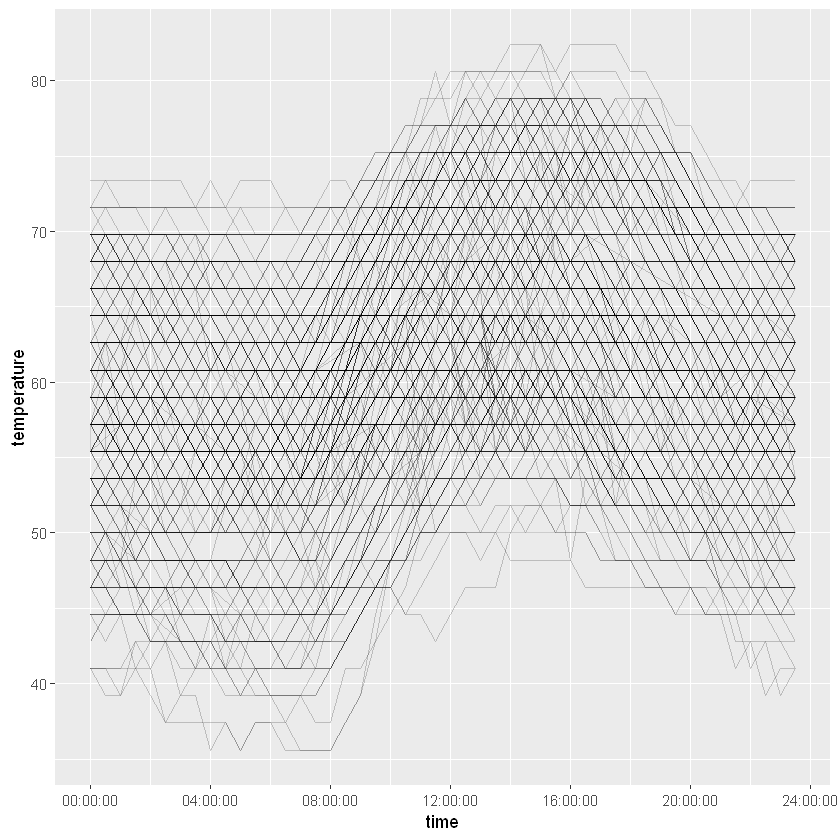

In [148]:
# A plot using just time
akl_hourly %>% 
    ggplot(aes(x = time, y = temperature)) +
    geom_line(aes(group = make_date(year, month, mday)), alpha = 0.2)

Using time without date is a great way to examine daily patterns.

## More on importing and exporting datetimes

> ### Fast parsing
- `parse_date_time()` can be slow because it's designed to be forgiving and flexible.

In [152]:
fastPOSIXct("1997-06-16")

[1] "1997-06-16 03:00:00 EAT"

> ### fast_strptime()

In [154]:
yob_str <- "1997-06-15"
parse_date_time(yob_str, order="ymd")

[1] "1997-06-15 UTC"

In [155]:
fast_strptime(yob_str, format = "%Y-%m-%d")

[1] "1997-06-15 UTC"

> ### Exporting datetimes

In [162]:
akl_hourly %>%
    select(datetime) %>%
    write_csv("datasets/tmp.csv")

> ### Formatting datetimes

In [163]:
yob_stamp <- stamp("Sunday June 15 1997")

Multiple formats matched: "%A %B %d %Y"(1), "Sunday %Om %d %Y"(1), "Sunday %B %d %Y"(1), "%A %Om %d %Y"(0)
Using: "%A %B %d %Y"


In [164]:
yob_stamp(ymd("1997-06-15"))

[1] "Sunday June 15 1997"

In [166]:
yob_stamp 

function (x, locale = "English_United States.1252") 
{
    {
        old_lc_time <- Sys.getlocale("LC_TIME")
        if (old_lc_time != locale) {
            on.exit(Sys.setlocale("LC_TIME", old_lc_time))
            Sys.setlocale("LC_TIME", locale)
        }
    }
    format(x, format = "%A %B %d %Y")
}
<environment: 0x00000000083bbb08>

### Fast parsing with fasttime

The fasttime package provides a single function `fastPOSIXct()`, designed to read in datetimes formatted according to ISO 8601. Because it only reads in one format, and doesn't have to guess a format, it is really fast!

We'll see how fast by comparing how fast it reads in the dates from the Auckland hourly weather data (over 17,000 dates) to lubridates `ymd_hms()`.

In [175]:
# Examine structure of dates
str(akl_hourly$datetime_string)

 chr [1:17454] "2016-01-01T00:00:00" "2016-01-01T00:30:00" ...


In [176]:
# Use fastPOSIXct() to parse dates
fastPOSIXct(akl_hourly$datetime_string) %>% str()

 POSIXct[1:17454], format: "2016-01-01 03:00:00" "2016-01-01 03:30:00" "2016-01-01 04:00:00" ...


In [177]:
# Compare speed of fastPOSIXct() to ymd_hms()
microbenchmark(
  ymd_hms = ymd_hms(akl_hourly$datetime_string),
  fasttime = fastPOSIXct(akl_hourly$datetime_string),
  times = 20)

expr,time
fasttime,2455100
ymd_hms,30602000
fasttime,2577700
ymd_hms,31090200
fasttime,2762600
fasttime,2779400
fasttime,2796400
fasttime,2786900
ymd_hms,35160800
fasttime,2590900


fasttime is about 20 times faster than ymd_hms().

### Fast parsing with lubridate::fast_strptime

lubridate provides its own fast datetime parser: `fast_strptime()`. Instead of taking an `order` argument like `parse_date_time()` it takes a `format` argument and the format must comply with the `strptime()` style.

In [179]:
# Head of dates
head(akl_hourly$datetime_string)

[1] "2016-01-01T00:00:00" "2016-01-01T00:30:00" "2016-01-01T01:00:00"
[4] "2016-01-01T01:30:00" "2016-01-01T02:00:00" "2016-01-01T02:30:00"

In [181]:
# Parse dates with fast_strptime
fast_strptime(akl_hourly$datetime_string, 
    format = "%Y-%m-%dT%H:%M:%S") %>% str()

 POSIXlt[1:17454], format: "2016-01-01 00:00:00" "2016-01-01 00:30:00" "2016-01-01 01:00:00" ...


In [182]:
# Comparse speed to ymd_hms() and fasttime
microbenchmark(
  ymd_hms = ymd_hms(akl_hourly$datetime_string),
  fasttime = fastPOSIXct(akl_hourly$datetime_string),
  fast_strptime = fast_strptime(akl_hourly$datetime_string, 
    format = "%Y-%m-%dT%H:%M:%S"),
  times = 20)

expr,time
ymd_hms,42620600
ymd_hms,46698300
fast_strptime,3006900
ymd_hms,29005100
ymd_hms,28695300
fasttime,2406000
fasttime,2340100
fasttime,2312100
fasttime,2310500
ymd_hms,31183400


### Outputting pretty dates and times

An easy way to output dates is to use the `stamp()` function in lubridate. `stamp()` takes a string which should be an example of how the date should be formatted, and returns a function that can be used to format dates.

In [183]:
# Create a stamp based on "Saturday, Jan 1, 2000"
date_stamp <- stamp("Saturday, Jan 1, 2000")

# Print date_stamp
date_stamp

Multiple formats matched: "%A, %b %d, %Y"(1), "Saturday, Jan %Om, %Y"(1), "Saturday, %Om %d, %Y"(1), "Saturday, %b %d, %Y"(1), "Saturday, Jan %m, %Y"(1), "%A, Jan %Om, %Y"(0), "%A, %Om %d, %Y"(0), "%A, Jan %m, %Y"(0)
Using: "%A, %b %d, %Y"


function (x, locale = "English_United States.1252") 
{
    {
        old_lc_time <- Sys.getlocale("LC_TIME")
        if (old_lc_time != locale) {
            on.exit(Sys.setlocale("LC_TIME", old_lc_time))
            Sys.setlocale("LC_TIME", locale)
        }
    }
    format(x, format = "%A, %b %d, %Y")
}
<environment: 0x000000003728c3d8>

In [184]:
# Call date_stamp on today()
date_stamp(today())

[1] "Tuesday, Jul 14, 2020"

In [185]:
# Create and call a stamp based on "12/31/1999"
stamp("12/31/1999")(today())

Multiple formats matched: "%Om/%d/%Y"(1), "%m/%d/%Y"(1)
Using: "%Om/%d/%Y"


[1] "07/14/2020"

In [186]:
finished = "I finished 'Dates and Times in R' on Thursday, September 4, 2017!"

In [187]:
# Use string finished for stamp()
stamp(finished)(today())


Multiple formats matched: "I finished 'Dates and Times in R' on %A, %B %d, %Y!"(1), "I finished 'Dates and Times in R' on Thursday, September %Om, %Y!"(1), "I finished 'Dates and Times in R' on Thursday, %Om %d, %Y!"(1), "I finished 'Dates and Times in R' on Thursday, %B %d, %Y!"(1), "I finished 'Dates and Times in R' on Thursday, September %m, %Y!"(1), "I finished 'Dates and Times in R' on %A, September %Om, %Y!"(0), "I finished 'Dates and Times in R' on %A, %Om %d, %Y!"(0), "I finished 'Dates and Times in R' on %A, September %m, %Y!"(0)
Using: "I finished 'Dates and Times in R' on %A, %B %d, %Y!"


[1] "I finished 'Dates and Times in R' on Tuesday, July 14, 2020!"

# Wrapping-up
- Chapter 1: base R objects Date, POSIXct
- Chapter 2: importing and manipulating datetimes
- Chapter 3: arithmetic with datetimes, periods, durations andintervals
- Chapter 4: time zones, fast parsing, outputting datetimes

{{'source: [https://xkcd.com/1179](https://xkcd.com/1179)' | fndetail 1}}
{{'Source: [Monarchs of England](https://en.wikipedia.org/wiki/List_of_monarchs_in_Britain_by_length_of_reign)' | fndetail 2}}
{{'Source: [Halley's cometHalley'scomet:](https://en.wikipedia.org/wiki/Halley%27s_Comet#Apparitionshalleys#)' | fndetail 3}}